
# **Machine Learning Essentials**
# **Exercise** 1

# Team Members:
## 1. Abhinand Poosarala
## 2. Priti Kamat
## 3. Siddhant Bhadsavale


# 1 Exploring the Data

In [1]:
import numpy as np
import sklearn
from sklearn import model_selection
from sklearn.datasets import load_digits
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import cm
from PIL import Image as im

In [2]:
digits = load_digits()
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

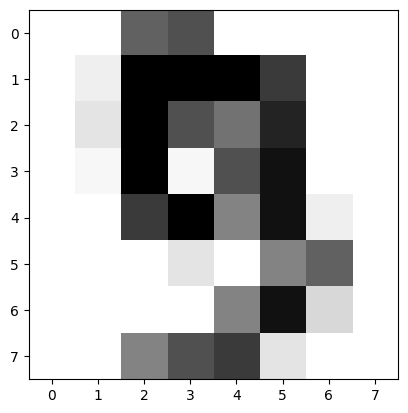

In [3]:
img = images[9]
plt.figure()
plt.gray()
plt.imshow(img, cmap='Greys',  interpolation='nearest')
plt.show()


# 2 Hand-crafted classifier
## 2.1 Feature construction:

In [4]:
X = []
Y = []
X_3 = []
X_9 = []

for i in range(len(data)):
  if target[i] == 3:
    X_3.append(images[i])
    X.append(images[i])
    Y.append(target[i])
  elif target[i] == 9:
    X_9.append(images[i])
    X.append(images[i])
    Y.append(target[i])

In [5]:
X_train , X_test , Y_train , Y_test = model_selection.train_test_split(X, Y,test_size = 0.4, random_state = 0)

### Here we have selected the two feature values by observing the total weighted average of all pixels in the images. The feautres outputs a higher value for images containing 9. 


In [6]:
def features2d(x):
    length = len(x)
    features = np.zeros([length,3])

    for i in range(length):
      features[i][0] = Y_train[i]
      # Feature 1:
      features[i][1] = 0.89*x[i][3][2] + 0.4*x[i][0][2]
      # Feature 2:
      features[i][2] = 0.71*x[i][3][2] + 0.77*x[i][2][2]
      
    return features

In [7]:
result = features2d(X_train)

 <div style="color: green; font-weight:
bold">
It's good practice to give your variables more sensible names than this, e.g. 'y_prediction_train' or 'y_hat_train'.
</div>


## 2.2 Scatterplot:

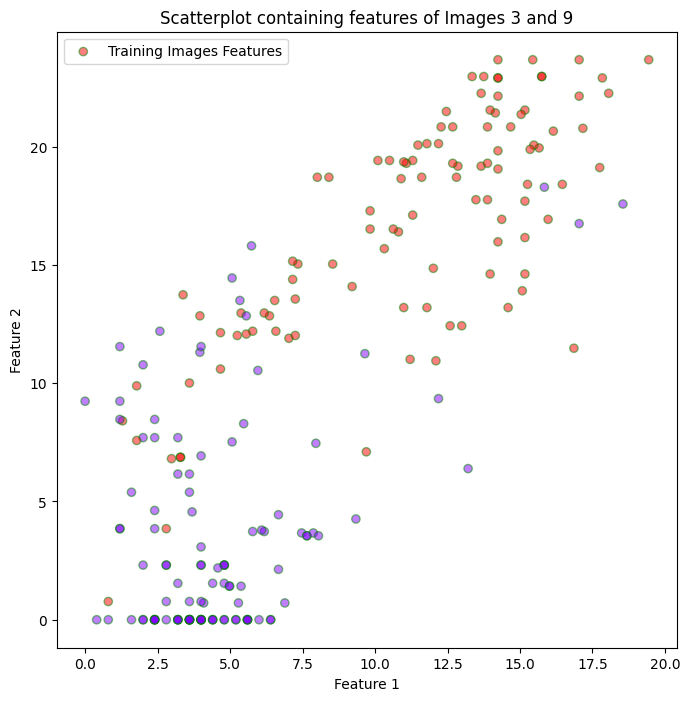

In [8]:
plt.figure(figsize=(8,8))
tar = result[:,0]
plt.scatter(result[:,1],result[:,2],c =tar,cmap='rainbow',edgecolor = "g", alpha=0.5, label='Training Images Features')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatterplot containing features of Images 3 and 9')
plt.legend()
plt.show()

## 2.3 Decision rule:

In [9]:
def features2d_test(x):
    length = len(x)
    features = np.zeros([length,3])

    for i in range(length):
      features[i][0] = Y_train[i]
      # Feature 1:
      features[i][1] = 0.89*x[i][3][2] + 0.4*x[i][0][2]
      # Feature 2:
      features[i][2] = 0.71*x[i][3][2] + 0.77*x[i][2][2]
      
    return features

In [10]:
def nearest_mean(training_features, training_labels, test_features):
  plotter_9_x_1 = []
  plotter_9_x_2 = []
  plotter_3_x_1 = []
  plotter_3_x_2 = []
  y_predict = np.zeros([len(test_features)])

  for i in range(len(training_features)):
    if training_labels[i] == 9: 
      plotter_9_x_1.append(training_features[i][0])
      plotter_9_x_2.append(training_features[i][1])
    elif training_labels[i] == 3:
      plotter_3_x_1.append(training_features[i][0])
      plotter_3_x_2.append(training_features[i][1])

  plotter_3_x_1_mean = np.average(plotter_3_x_1)
  plotter_3_x_2_mean = np.average(plotter_3_x_2)
  
  for i in range(len(test_features)):
    if test_features[i][0] > plotter_3_x_1_mean and test_features[i][1] > plotter_3_x_2_mean:
      y_predict[i] = 9
    else:
      y_predict[i] = 3

  return y_predict

In [11]:
test_features = features2d_test(X_test)

In [12]:
feature_set = [1,2]
training_predicted_labels = nearest_mean(result[:,feature_set], result[:,0], result[:,feature_set])
predicted_labels = nearest_mean(result[:,feature_set], result[:,0], test_features[:,feature_set])

In [13]:
def calculate_false_positive_and_false_negative(actual_labels, predicted_labels):
    assert len(actual_labels) == len(predicted_labels), "Number of actual and predicted labels must be the same."
    fp = 0  # False positives counter
    fn = 0  # False negatives counter
    n = len(actual_labels)

    for i in range(n):
        if actual_labels[i] == 3 and predicted_labels[i] == 9:
            fp += 1
        elif actual_labels[i] == 9 and predicted_labels[i] == 3:
            fn += 1

    false_positive_rate = fp / n
    false_negative_rate = fn / n
    return false_positive_rate, false_negative_rate

In [14]:
fp_rate_train, fn_rate_train = calculate_false_positive_and_false_negative(Y_train, training_predicted_labels)
fp_rate_test, fn_rate_test = calculate_false_positive_and_false_negative(Y_test, predicted_labels)

Train_error = fp_rate_train + fn_rate_train
Test_error = fp_rate_test + fn_rate_test

print("Training Error:", Train_error)
print("Testing Error:", Test_error)

Training Error: 0.1382488479262673
Testing Error: 0.1232876712328767


### Training Error: 0.1382488479262673
### Testing Error: 0.1232876712328767

# 2.4 Visualize the decision regions:

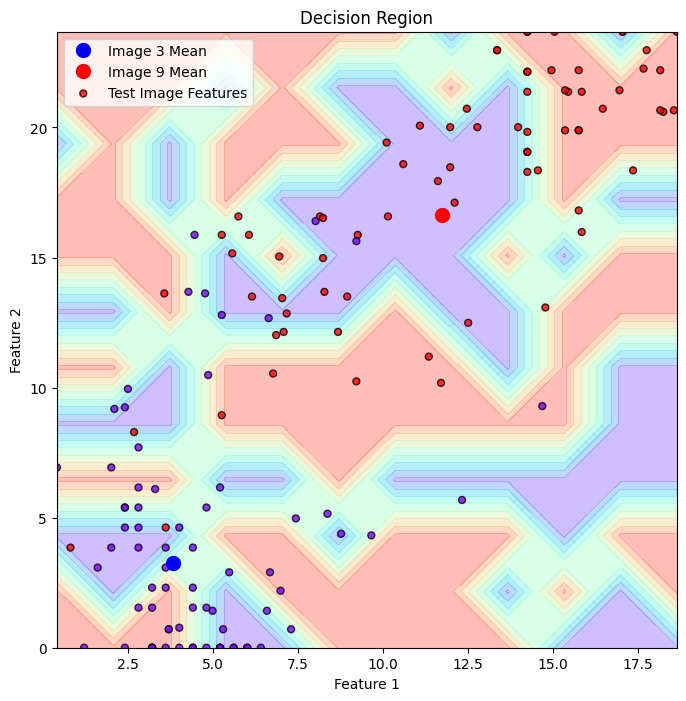

In [15]:
test_features_1 = test_features[:,1]
test_features_2 = test_features[:,2]

mean_9_0 = []
mean_9_1 = []
mean_3_0 = []
mean_3_1 = []

for i in range(len(test_features)):
  if predicted_labels[i] == 9:
    mean_9_0.append(test_features[i][1])
    mean_9_1.append(test_features[i][2])
  elif predicted_labels[i] == 3:
    mean_3_0.append(test_features[i][1])
    mean_3_1.append(test_features[i][2])    

grid_size = 12

x = np.linspace(min(test_features_1), max(test_features_1), grid_size)
y = np.linspace(min(test_features_2), max(test_features_2), grid_size)
X, Y = np.meshgrid(x, y)

X_flat = X.flatten()
Y_flat = Y.flatten()
grid_points = np.column_stack((X_flat, Y_flat))

Z = predicted_labels[:144].reshape(12,12)

fig, ax = plt.subplots(figsize=(8, 8))
ax.contourf(X, Y, Z, cmap='rainbow', alpha=0.3)

ax.plot(np.average(mean_3_0), np.average(mean_3_1), 'bo', markersize=10, label='Image 3 Mean')
ax.plot(np.average(mean_9_0), np.average(mean_9_1), 'ro', markersize=10, label='Image 9 Mean')

ax.scatter(test_features[:, 1], test_features[:, 2], c=Y_test, cmap='rainbow', edgecolors='black', s=25, label='Test Image Features', alpha=0.8)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Decision Region')
ax.legend()

plt.show()

 <div style="color: green; font-weight:
bold">
The scatter plot is fine, but the decision region plot is fundamentally flawed. You're supposed to apply the prediction function, in this case 'nearest_mean', to a coordinate grid and plot its values in the corresponding position. Instead, you take the first few predictions from the test set and plot them in an arbitrary order. It's not surprising that the result looks uniformly distributed. You actually create a 'grid_points' variable but then do nothing with it, so probably not much needs to be changed.<p>
Also, the grid needs a higher resolution than 12x12. The sample solution uses 2000x2000 which is overkill, but something like 100x100 should be fine.
</div>


# 3 LDA

## 3.1 Implement LDA training

In [16]:
def fit_lda(training_features, training_labels):
  data_3_features = np.zeros([300,2])
  data_9_features = np.zeros([300,2])
  sum_of_3 =np.zeros([1,2])
  mean_of_3= np.zeros([1,2])
  sum_of_9 =np.zeros([1,2])
  mean_of_9= np.zeros([1,2])
  mean = [0,0]
  prior = [0,0]
  covmatrix_of_3 = np.zeros([2,2])
  covmatrix_of_9 = np.zeros([2,2])
  covmatrix_summation = np.zeros([2,2])


  for i in range(len(result)):
    if training_labels[i] == 9:
        data_9_features[i][0] =  training_features[i][0]
        data_9_features[i][1] =  training_features[i][1]
    elif training_labels[i] == 3:
        data_3_features[i][0] =  training_features[i][0]
        data_3_features[i][1] =  training_features[i][1]
        
  data_3_features = data_3_features[~np.all(data_3_features == 0, axis=1)]
  data_9_features = data_9_features[~np.all(data_9_features == 0, axis=1)]

  for i in range(len(data_3_features)):
    sum_of_3 +=data_3_features[i] 

  for i in range(len(data_9_features)):
    sum_of_9 +=data_9_features[i]

  mean_of_3 = sum_of_3/len(data_3_features)
  mean_of_9 = sum_of_9/len(data_9_features)
  mean[0] = mean_of_3
  mean[1] = mean_of_9

  for i in range(len(data_3_features)):
    covmatrix_of_3 +=(data_3_features[i]- mean_of_3).T.dot((data_3_features[i]- mean_of_3))

  for i in range(len(data_9_features)):
    covmatrix_of_9 +=(data_9_features[i]- mean_of_9).T.dot((data_9_features[i]- mean_of_9))

  covmatrix_now_initial = np.sum([covmatrix_of_3, covmatrix_of_9], axis=0)
  covmatrix_summation = covmatrix_now_initial/(len(data_3_features)+len(data_9_features))

  prior_overall_3 = len(data_3_features)/(len(data_3_features)+len(data_9_features))
  prior_overall_9 = len(data_9_features)/(len(data_3_features)+len(data_9_features))
  prior[0] = prior_overall_3
  prior[1] = prior_overall_9

  return mean, covmatrix_summation, prior

 <div style="color: green; font-weight:
bold">
This function can be written much cleaner, see the sample solution. In particular, the sample solution loops over the possible labels, so there are only two loops, whereas you loop over training instances, which scales badly.
</div>

In [17]:
mean, covmatrix_summation, prior = fit_lda(result[:,feature_set],result[:,0])


## 3.2 Implement LDA prediction

In [18]:
def sign_function(x, beta, b):
    result = np.sign(np.dot(x, beta) + b)
    return result

In [19]:
def predict_lda(mean, covmatrix_summation, p, test_features):
  Beta = np.zeros([1,2])
  b_intercept = np.zeros([1,2])
  data_3_features = np.zeros([300,2])
  data_9_features = np.zeros([300,2])
  selection_list = [1,2]
  Y_hat =[]

  for i in range(len(test_features)):
    if test_features[i][0] == 9:
        data_9_features[i][0] =  test_features[i][1]
        data_9_features[i][1] =  test_features[i][2]
    elif test_features[i][0] == 3:
        data_3_features[i][0] =  test_features[i][1]
        data_3_features[i][1] =  test_features[i][2]
  inverse_of_matrix = np.linalg.inv(covmatrix_summation)

  Beta = (inverse_of_matrix)*((mean[1]-mean[0]).T)
  b_intercept = (-1/2)*np.dot((mean[1]+mean[0]),Beta)+np.log2(len(data_9_features)/len(data_3_features))
  test_features_y_hat = test_features[:,selection_list]

  for i in range(len(test_features_y_hat)):
    Y_hat.append(sign_function(test_features_y_hat[i],Beta,b_intercept),)
  return Y_hat

In [20]:
def features2d_test(x):
    length = len(x)
    features = np.zeros([length,3])
    for i in range(length):
      # Feature 1:
      features[i][0] = Y_test[i]
      features[i][1] = 0.89*x[i][3][2] + 0.4*x[i][0][2]
      # Feature 2:
      features[i][2] = 0.71*x[i][3][2] + 0.77*x[i][2][2]
    return features

In [21]:
test_features = features2d_test(X_test)
Y_hat_0= predict_lda(mean, covmatrix_summation, prior, test_features)

training_features = features2d(X_train)
Y_hat_train_0= predict_lda(mean, covmatrix_summation, prior, training_features)

In [22]:
Y_hat_1 = np.concatenate(Y_hat_0, axis=0)
Y_hat = Y_hat_1[:,1]

Y_hat_train_1 = np.concatenate(Y_hat_train_0, axis=0)
Y_hat_train = Y_hat_train_1[:,1]

for i in range(len(Y_hat)):
  if Y_hat[i] == 1:
    Y_hat[i] = 9
  elif Y_hat[i] == -1:
    Y_hat[i] = 3

for i in range(len(Y_hat_train)):
  if Y_hat_train[i] == 1:
    Y_hat_train[i] = 9
  elif Y_hat_train[i] == -1:
    Y_hat_train[i] = 3

In [23]:
fp_rate_train, fn_rate_train = calculate_false_positive_and_false_negative(Y_train, Y_hat_train)
fp_rate_test, fn_rate_test = calculate_false_positive_and_false_negative(Y_test, Y_hat)

Train_error_lda = fp_rate_train + fn_rate_train
Test_error_lda = fp_rate_test + fn_rate_test

print("Training Error:", Train_error_lda)
print("Testing Error:", Test_error_lda)

Training Error: 0.12903225806451613
Testing Error: 0.11643835616438356


### Training Error using LDA formulas to perform classification : 12.90%
### Testing Error using LDA formulas to perform classification: 11.64%

 <div style="color: green; font-weight:
bold">
It remains to show the error of LDA on the full pixel space.
</div>


## 3.3 Visualization

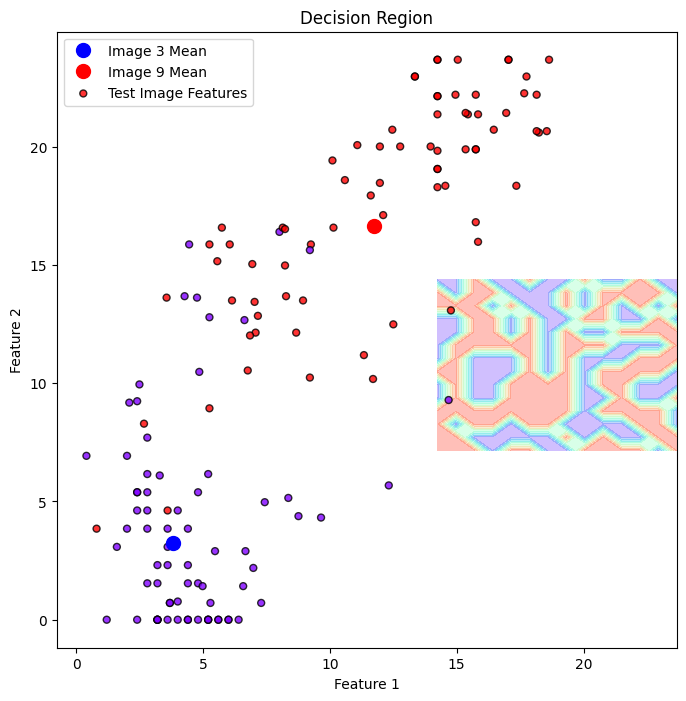

In [24]:
#TODO

train_features = features2d(X_train)
test_features = features2d_test(X_test)
features_slecection = [1,2]

X_training = train_features[:,features_slecection]
X_testing = test_features[:,features_slecection]

grid_size = 14

x = np.linspace(min(X_training[0]), max(X_training[0]), grid_size)
y = np.linspace(min(X_training[1]), max(X_training[1]), grid_size)
X, Y = np.meshgrid(x, y)

X_flat = X.flatten()
Y_flat = Y.flatten()
grid_points = np.column_stack((X_flat, Y_flat))

Z = Y_hat_train[:196].reshape(14,14)

fig, ax = plt.subplots(figsize=(8, 8))
ax.contourf(X, Y, Z, cmap='rainbow', alpha=0.3)

ax.plot(np.average(mean_3_0), np.average(mean_3_1), 'bo', markersize=10, label='Image 3 Mean')
ax.plot(np.average(mean_9_0), np.average(mean_9_1), 'ro', markersize=10, label='Image 9 Mean')

ax.scatter(test_features[:, 1], test_features[:, 2], c=Y_test, cmap='rainbow', edgecolors='black', s=25, label='Test Image Features', alpha=0.8)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Decision Region')
ax.legend()
plt.show()


 <div style="color: green; font-weight:
bold">
Same problems as before, but somehow smaller
</div>


## 3.4 Quantitative performance evaluation

In [25]:
all_features = np.concatenate((training_features,test_features),axis=0)
final_features = all_features[:,feature_set]
all_Y = np.concatenate((Y_train,Y_test), axis=0)

lda = LinearDiscriminantAnalysis()
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(lda,final_features,all_Y,cv=cv)

In [26]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.90 accuracy with a standard deviation of 0.04


### Output: 0.90 accuracy with a standard deviation of 0.04

In [27]:
lda.fit(training_features, Y_train)
next_y = lda.predict(test_features)

fp_rate_test, fn_rate_test = calculate_false_positive_and_false_negative(Y_test, next_y)
Test_error_lda = fp_rate_test + fn_rate_test

print("Testing Error using Sklearn LDA:", Test_error_lda)

Testing Error using Sklearn LDA: 0.0821917808219178


## Testing error comparision between our implementation and Sklearn implementation

1.   Testing Error with our implementation: 11.64%
2.   Testing Error with Sklearn LDA implementation: 8.21%



 <div style="color: green; font-weight:
bold">
Again, this is the result on the feature space and thus dependent on the hand-picked features, but the pixel space is more interesting.
</div>

# 4 SVM

Implementing SVM using sklearn

In [28]:
train_features = features2d(X_train)
test_features = features2d_test(X_test)
features_slecection = [1,2]

X_training = train_features[:,features_slecection]
X_testing = test_features[:,features_slecection]

In [29]:
def fit_svm(train_result,y_train):
  betaList = []
  bList = []
  final_beta_List = []
  random_value = np.random.normal(loc=0.5, scale=0.1)
  random_value = max(0, min(random_value, 1))
  betaZero = random_value
  bZero = 0
  currBeta = 0.0 
  currbIntercept = 0.0
  product = np.zeros([2,1])
  b_intercept = 0
  betaSum = 0.0
  bSum = 0.0
  for i in range(3):
    if not betaList:
        betaList.insert(i,betaZero)
        currBeta = betaZero
        betaSum += currBeta
    if not bList:
        bList.insert(i,bZero)
        currbIntercept = bZero
        bSum += currbIntercept
        continue
        
    if i == 0 and betaList and betaList:
        continue
    
    for feature in train_result:
        if((np.dot(feature,currBeta) + currbIntercept) < 1).all:
            betaSum +=  -1 * (np.dot(y_train[i],(feature.T)))
            bSum += -1 * (y_train[i])
    
    #calculating beta
    beta = betaList[i - 1] - np.dot(1,betaList[i - 1] + (0.00075/len(train_result) * betaSum))
    currBeta = beta
        
    #calculating b Intercept
    b_intercept = bList[i - 1] - np.dot(1,(0.00075/len(train_result) * bSum))
    currbIntercept = b_intercept
        
    #updating the list
    betaList.insert(i,currBeta)
    bList.insert(i,currbIntercept)
    for i in range(len(betaList)):
      if(i == 0):
        final_beta_List.insert(i,betaZero)
        continue
      final_beta_List.insert(i,betaList[i][0])
    
    return final_beta_List, bList

 <div style="color: green; font-weight:
bold">
I'm not entirely sure what's happening here, but I doubt it's correct, judging from the error rate below. I suggest studying the sample solution.
</div>

In [30]:
betalist, blist = fit_svm(X_training,Y_train)

In [31]:
def predict_smv(betalist, blist, test_features):
  Y_hat_SVM = []
  for i in range(len(test_features)):
    Y_hat_SVM.append(sign_function(X_testing[i],betalist[-1],((-1)*blist[-1])))
  
  return Y_hat_SVM

In [32]:
Y_hat_SVM_predicted_1 = predict_smv(betalist, blist, test_features)

In [33]:
positive_svm = 0
negative_svm = 0
for i, (row, value) in enumerate(zip(Y_hat_SVM_predicted_1, Y_test[:len(Y_hat_SVM_predicted_1)])):
    if(row[1] == 1 and value == 9 or row[1] == -1 and value == 3):
        positive_svm = positive_svm + 1
    else:
        negative_svm = negative_svm + 1

print("Testing Error:",negative_svm/(positive_svm+negative_svm))

Testing Error: 0.363013698630137


### Testing Error by using formulas to classify the images: 36%

In [34]:
svm = SVC(kernel='linear')
svm.fit(X_training, Y_train)
Z = svm.predict(X_testing)

print(svm.coef_)

fp_rate_test, fn_rate_test = calculate_false_positive_and_false_negative(Y_test, Z)
Test_error_svm = fp_rate_test + fn_rate_test

print("Testing Error using Sklearn SVM:", Test_error_svm)

[[0.05409989 0.22063684]]
Testing Error using Sklearn SVM: 0.08904109589041095


### Testing Error using Sklearn SVM: 8.90%

### How does the prediction quality change relative to LDA and the nearest mean classifier?

It is observed that the percentage of error is seen least in SVM when compared to LDA and nearest mean classifier.